## <span style = "background:#4D1873; font-size:150%; bold; color:##FFFFFF;"><center>TWITTER SENTIMENT ANALYSIS~😊🤬</center></span>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873; font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">INTRODUCTION</p>

<div style="border-radius:5px;
            border : black solid;
            background-color: ##FFFFFF;
            text-align: left">


#### <mark>What is sentiment analysis?</mark> 
Twitter sentiment analysis analyzes the sentiment or emotion of tweets. It uses natural language processing and machine learning algorithms to classify tweets automatically as positive, negative, or neutral based on their content. It can be done for individual tweets or a larger dataset related to a particular topic or event.

#### <mark>Types of sentiment analysis</mark>
There are generally four main types of sentiment analysis:

* Fine-grained sentiment analysis :- Provides detailed polarity (e.g., very positive, positive, neutral, negative, very negative).
* Emotion detection :- Identifies specific emotions (e.g., happiness, sadness, anger, etc.).
* Intent-based analysis :- Recognizes the actions or intent behind the sentiment (e.g., a request for help).
* Aspect-based analysis :- Focuses on particular aspects or components of a product or service (e.g., battery life in a phone review).


#### <mark>How to Do Twitter Sentiment Analysis Dataset?</mark>
To perform Twitter sentiment analysis, we use machine learning algorithms, which contains labeled tweets. The goal is to develop a machine learning pipeline using three classifiers: Logistic Regression, Bernoulli Naive Bayes, and Support Vector Machine (SVM).

The key steps include:

* TF-IDF (Term Frequency-Inverse Document Frequency): This technique is used to convert the tweet text into numerical data.
* Evaluation: The performance of these classifiers is measured using accuracy and F1 scores.

For preprocessing, the NLTK (Natural Language Toolkit) library is used to clean and prepare the tweet text for analysis.

#### <mark>Twitter Sentiment Analysis: Problem Statement</mark>
In this Twitter Sentiment Analysis project, the goal is to develop a Natural Language Processing (NLP) model that classifies tweets as either positive or negative. The dataset used is the Sentiment Dataset, which contains 1,600,000 tweets (rows, 6 - columns) extracted via the Twitter API.

The dataset includes the following columns:

* target: Indicates the sentiment of the tweet (positive or negative).
* ids: A unique ID for each tweet.
* date: The date when the tweet was posted.
* flag: Refers to the query associated with the tweet (if any).
* user: The username of the person who tweeted.
* text: The actual content of the tweet.
* The aim is to classify the sentiment of the tweets and overcome challenges in sentiment classification.

#### <mark>Twitter Sentiment Analysis Dataset: Project Pipeline</mark>
The various steps involved in the Machine Learning Pipeline are:
1. Import Necessary LIBRARIES, 
2. Read and Load the Dataset,
3. Exploratory Data Analysis,
4. Data Visualization of Target Variables,
5. Data Preprocessing,
6. Splitting our data into Train and Test sets,
7. Transforming Dataset using TF-IDF Vectorizer,
8. Function for Model Evaluation,
9. Model Building,
10. Model Evaluation.
11. Deployment
12. Monitoring and Model Updating

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task
- For data preprocessing, we will be using Natural Language Processing’s (NLP) NLTK(Natural Language Toolkit) library.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">IMPORT NECESSARY LIBRARIES</p>

In [96]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# warning
import warnings
warnings.filterwarnings("ignore")


from termcolor import colored
print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["dark", "bold"]))


LIBRARIES WERE SUCCESFULLY IMPORTED...


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Read and Load the Dataset</p>

In [97]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('sentimental_analysis.csv', encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
df.sample(5)

print(colored("\nDATASETS WERE SUCCESFULLY LOADED...", color = "green", attrs = ["dark", "bold"]))


DATASETS WERE SUCCESFULLY LOADED...


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Exploratory Data Analysis</p>

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Five top records of data</span>

In [98]:
df.head().style.background_gradient(cmap = "summer")

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Five Last records of data</span>

In [99]:
df.tail().style.background_gradient(cmap = "summer")

,target,ids,date,flag,user,text
1048571,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048572,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noodles. Yum.
1048573,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Terminiator movies. comes off like just 3 words. :-D
1048574,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048575,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Coloumns/features in data</span>

In [100]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Length of dataset</span>

In [101]:
print('length of data is', len(df))

length of data is 1048576


#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Shape of data</span>

In [102]:
df. shape

(1048576, 6)

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Data Information</span>

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Data types of all coloumns</span>

In [104]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Checking Null values</span>

In [105]:
np.sum(df.isnull().any(axis=1))

0

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Rows and columns in the dataset</span>

In [106]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1048576


#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Check unique target values</span>

In [107]:
df['target'].unique()

array([0, 4], dtype=int64)

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Check the number of target values</span>

In [108]:
df['target'].nunique()

2

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Data Visualization of Target Variables</p>

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Plotting the distribution for dataset</span>

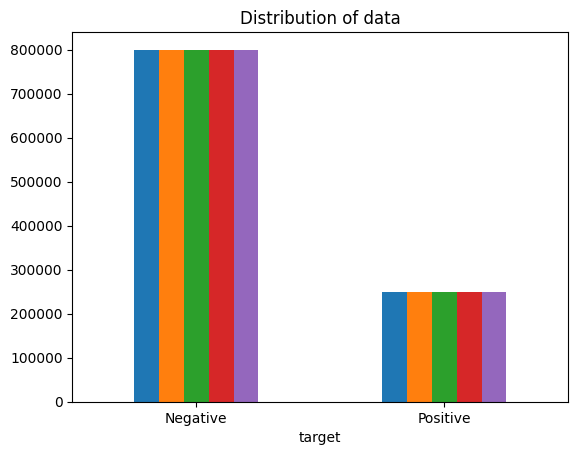

In [109]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

The bar chart illustrates the distribution of data across two target categories: "Negative" and "Positive". The "Negative" category shows a significantly higher count (around 800,000) compared to the "Positive" category (approximately 200,000). Each color in the bars represents different features or groups being visualized, but they all appear to have equal counts for both categories. This indicates a clear imbalance in the dataset, with many more negative instances than positive ones.

<Axes: xlabel='target', ylabel='count'>

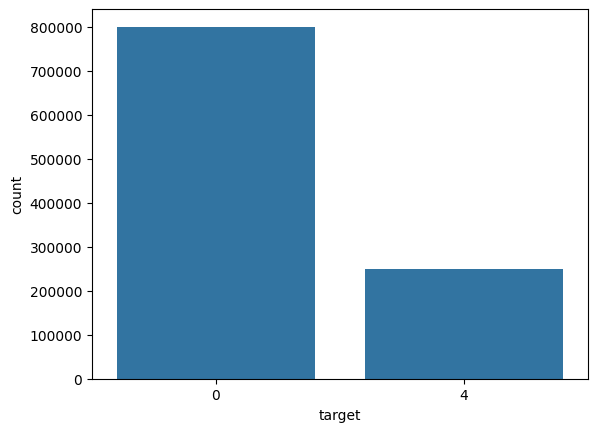

In [110]:
import seaborn as sns
sns.countplot(x='target', data=df)

This bar chart shows the distribution of data between two target values, "0" and "4". The count for target "0" is significantly higher, close to 800,000, while the count for target "4" is much lower, around 200,000. This indicates an imbalance in the dataset, with many more instances labeled as "0" compared to "4".

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Data Preprocessing</p>

##### The pre-processing steps included removing stopwords, special characters (emojis, hashtags), and URLs, converting text to lowercase for consistency, and cleaning punctuations. Repeating characters were removed to reduce noise. Finally, stemming (reducing words to their stems) and lemmatization (reducing words to their root forms) were applied for better model performance.

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Selecting the text and Target column for our further analysis</span>

In [111]:
data=df[['text','target']]

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)</span>

In [112]:
data['target'] = data['target'].replace(4,1)

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Printing unique values of target variables</span>

In [113]:
data['target'].unique()

array([0, 1], dtype=int64)

#### Separating positive and negative tweets

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Separating positive and negative tweets(Positive sentiment = 1 / Negative sentiment = 0)</span>

In [114]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Taking one-fourth of the data so we can run it on our machine easily</span>

In [115]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Combining positive and negative tweets</span>

In [116]:
dataset = pd.concat([data_pos, data_neg])

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Making statement text in lowercase</span>

In [117]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Defining set containing all stopwords in English.</span>

In [118]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Cleaning and removing the above stop words list from the tweet text.</span>

In [119]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Cleaning and removing punctuations.</span>

In [120]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Cleaning and removing repeating characters.</span>

In [121]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Cleaning and removing removing URLs.</span>

In [122]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Cleaning and removing numeric numbers.</span>

In [123]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Getting tokenization of tweet text.</span>

In [124]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;"> Applying stemming.</span>

In [125]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;"> Applying lemmatizer.</span>

In [126]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;"> Separating input feature and label.</span>

In [127]:
X=data.text
y=data.target

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Plot a cloud of words for negative tweets</span>

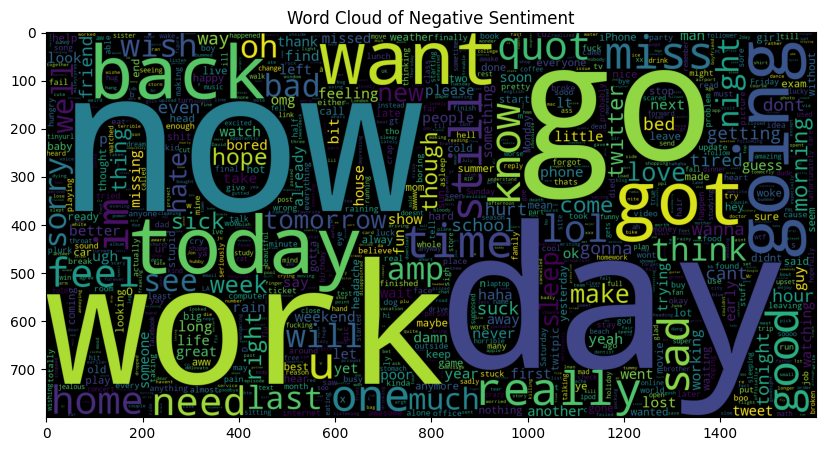

In [128]:
data_neg = data['text'][:800000]
plt.figure(figsize = (10,5))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.title('Word Cloud of Negative Sentiment')
plt.imshow(wc)

The word cloud displays the most frequently used words associated with negative sentiment. Larger words like "workday," "now," "go," "today," "want," and "back" indicate that these are commonly expressed terms in negative contexts. The frequent appearance of words like "feel," "need," and "got" also suggests common themes around dissatisfaction or frustration in daily life, especially related to work and time. This visual highlights key terms reflecting negative emotions and experiences.

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Plot a cloud of words for Positive tweets</span>

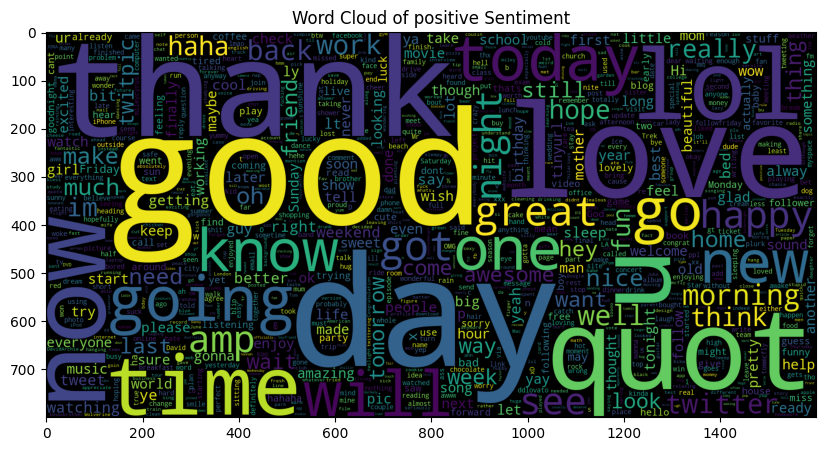

In [129]:

data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (10,5))
plt.title('Word Cloud of positive Sentiment')
plt.imshow(wc)



This word cloud image highlights the most frequently used words in texts associated with positive sentiment. The larger and more prominently a word appears, the more frequently it is used. The key words dominating this cloud are "good," "thank," "day," "love," and "time," indicating these are common themes in positive expressions. Words like "great," "today," "happy," and "morning" also stand out, further reflecting sentiments of gratitude, happiness, and positive experiences associated with time and relationships. The word cloud visually emphasizes positivity through commonly used language.

<b> <h3> Labels : </h3></b>  labels are the targets like in this project senitments of the tweets are target.

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs.

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Splitting Our Data Into Train and Test Subsets</p>

In [130]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Transforming the Dataset Using TF-IDF Vectorizer</p>

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Fit the TF-IDF Vectorizer</span>

In [131]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Transform the data using TF-IDF Vectorizer</span>

#### Transform the data using TF-IDF Vectorizer

In [132]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Function for Model Evaluation</p>

After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively:

* Accuracy Score
* Confusion Matrix with Plot
* ROC-AUC Curve

In [133]:
def model_Evaluate(model):
  
# Predict values for Test dataset
   y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
   print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
   cf_matrix = confusion_matrix(y_test, y_pred)
   categories = ['Negative','Positive']
   group_names = ['True Neg','False Pos', 'False Neg','True Pos']
   group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
   labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
   xticklabels = categories, yticklabels = categories)
   plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
   plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
   plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">Model Building</p>

In the problem statement, we have used three different models respectively :

* Bernoulli Naive Bayes Classifier
* SVM (Support Vector Machine)
* Logistic Regression

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Model-1 : Bernoulli Naive Bayes Classifier</span>

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     40097
           1       0.67      0.66      0.66     12332

    accuracy                           0.84     52429
   macro avg       0.78      0.78      0.78     52429
weighted avg       0.84      0.84      0.84     52429



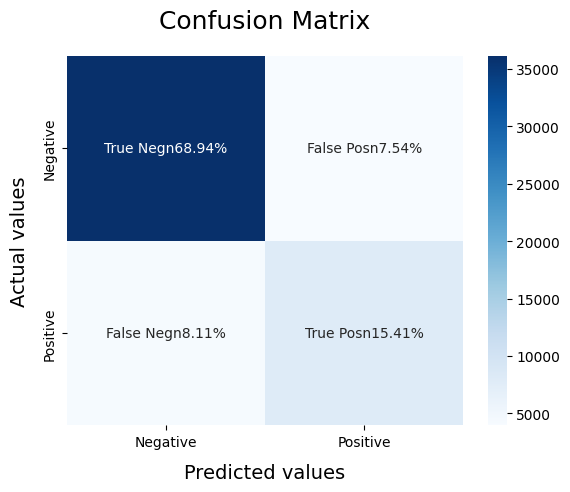

In [134]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Plot the ROC-AUC Curve for model-1</span>

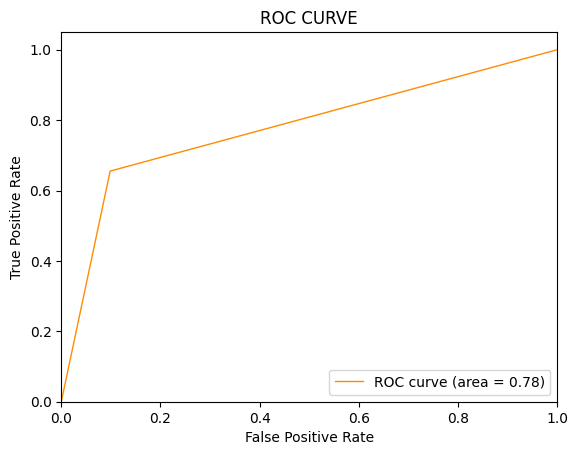

In [135]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Model-2 : SVM (Support Vector Machine)</span>

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     40097
           1       0.74      0.63      0.68     12332

    accuracy                           0.86     52429
   macro avg       0.81      0.78      0.80     52429
weighted avg       0.86      0.86      0.86     52429



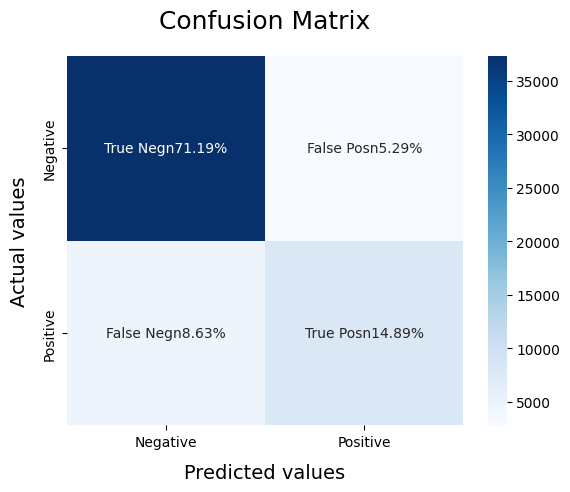

In [136]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Plot the ROC-AUC Curve for model-2</span>

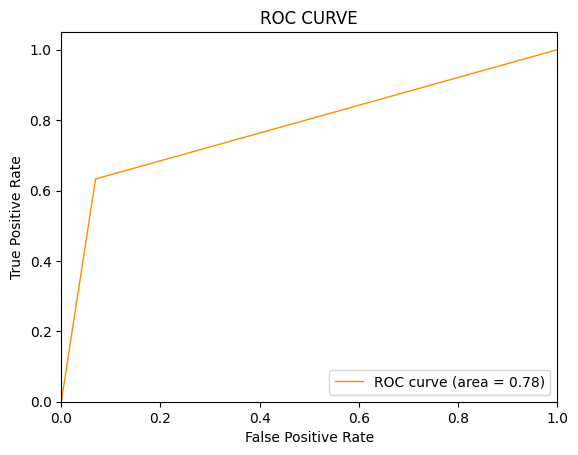

In [137]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Model-3 : Logistic Regression</span>

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     40097
           1       0.78      0.62      0.69     12332

    accuracy                           0.87     52429
   macro avg       0.83      0.78      0.80     52429
weighted avg       0.86      0.87      0.86     52429



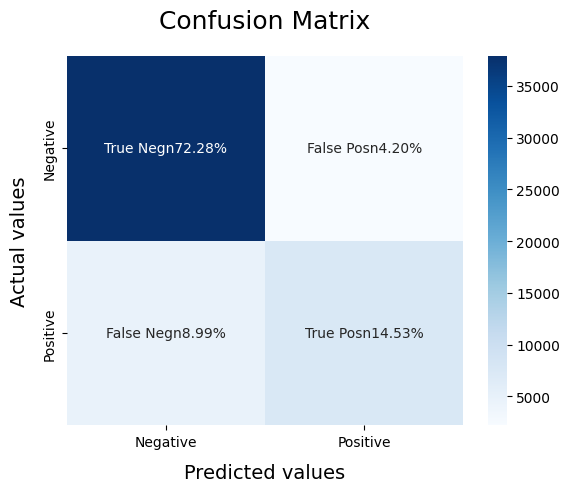

In [138]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

#### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Plot the ROC-AUC Curve for model-3</span>

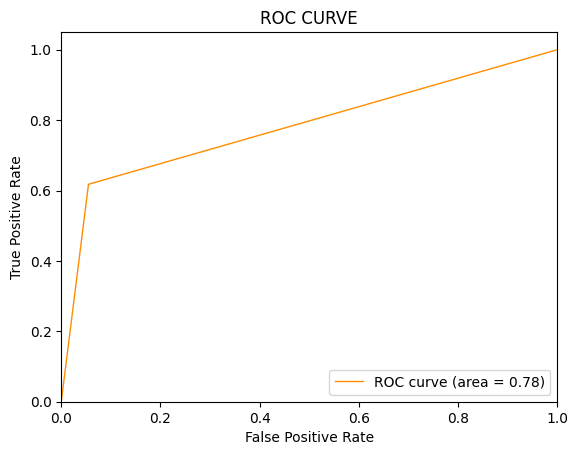

In [139]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation

Evaluating all the models, we can conclude the following details .

<b> <h3> Accuracy:</h2></b>  In terms of accuracy, Logistic Regression performed the best, followed by SVM (Support Vector Machine), and lastly, Bernoulli Naive Bayes had the lowest accuracy.

<b> <h3> F1-score:</h2></b>  
* For class 0  - (negative tweets), Logistic Regression had the best F1-score (0.92), followed by SVM (0.91), and then Bernoulli Naive Bayes (0.90).
* For class 1 - (positive tweets), Logistic Regression also performed the best (0.69), followed by SVM (0.68), and Bernoulli Naive Bayes had the lowest score (0.66).

<b> <h3> AUC Score:</h2></b>  All three models have the same ROC-AUC score but ,
* Logistic Regression is considered the best model for this dataset. This is because it follows the principle of Occam’s Razor, which suggests that the simplest solution is often the best when there are no assumptions about the data. Since our dataset has no specific assumptions, Logistic Regression, being a simple model, performs the best in this case.

<img src = "twitter.png">